# 5. 회귀(Regression)

### Regression

Classification이 이산형 데이터를 분류하는 것이라면 Regression은 키,온도와 같은 연속적인 값을 예측하는 문제이다. 예를 들어 한국 남자들의 키를 알고 싶을 때, 전수 조사는 어려우니까 샘플링을 하고 추측해본다. Training set을 통해 알고리즘을 적용하고 원가설을 추측할 수 있는 Hypothesis를 만든 다음, 우리가 갖고 있는 training data를 넣고 y값을 추측해본다.

---
### Linear Regression(선형 회귀) 

x와 y값 사이의 관계를 보기 위한 통계적인 프로세스이다. 모델의 적합도는 원본데이터와 비교해서 error로써 표현된다.

- Simple Linear Regression : 하나의 변수(x)를 가지고 y값을 예측하는 것이다. 실제 상황에서는 하나의 변수만으로 예측하기 어려운 경우가 많기 때문에 거의 쓰이지 않는다.

- Cost function : 예측 값과 실제 데이터의 차이를 이용해서 cost function 값을 계산하는데 이 값이 작을수록 예측이 정확한 것이다.
					
- Multiple Linear Regression : 여러 개의 변수가 있는 경우이다. 
    - Feature Scaling : 모든 feature가 비슷한 범위에 있도록 만들어 준다.
    - Feature들이 비슷한 범위에 있으면 수렴이 빠르다.
    - Mean normalization			
---
### 선형회귀와 관련된 사이킷런 함수/라이브러리

- sklearn.linear_model.LinearRegression: 선형회귀 모델(클래스)을 불러옵니다.

linear_model = LinearRegression()

- LinearRegression.fit(x, y): (x, y) 데이터셋에 대해서 모델을 학습시킵니다.

- LinearRegression.predict(x): x 데이터를 바탕으로 예측되는 값을 출력합니다.

reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[[ 8.87583891]
 [12.26129085]
 [ 3.65936838]
 [ 8.06887608]
 [ 9.41701309]
 [ 2.08915148]
 [ 9.92538464]
 [12.72738715]
 [ 5.72404071]
 [ 4.24986799]]


C:\Users\97030\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


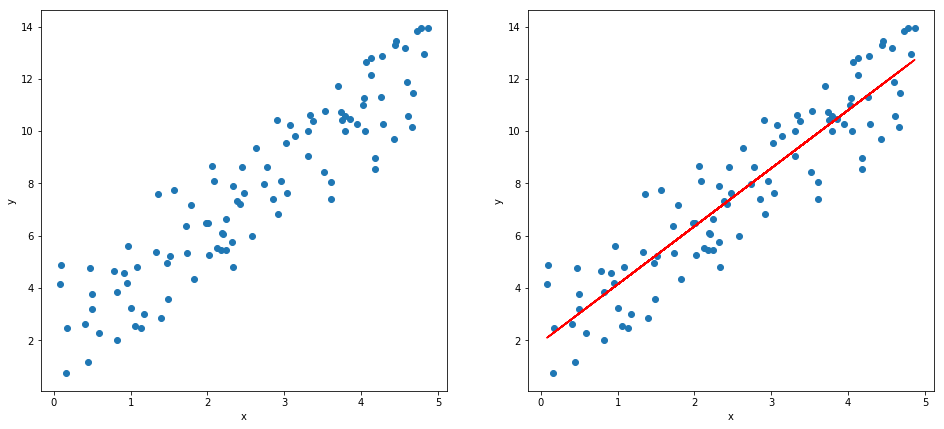

In [2]:
#사이킷런을 활용한 선형 회귀(Linear Regression)
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.linear_model import LinearRegression

## 데이터 x와 y를 생성
x = 5*np.random.rand(100,1)
y = 2*x + 5*np.random.rand(100,1)

lr = LinearRegression() # 회귀 모델을 만들기

lr.fit(x,y) #모델을 학습

predicted = lr.predict(x) # 회귀 결과를 출력
print(predicted[:10])

#시각화
fig, ax = plt.subplots(1,2, figsize=(16, 7))

ax[0].scatter(x,y)
ax[1].scatter(x,y)
ax[1].plot(x, predicted, color='r')

ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

fig.show()

---
## 사이킷런을 활용한 다항 회귀

### 유용한 함수

- PolynomialFeatures(degree): Polynomial 객체를 생성합니다.
    - degree: 만들어줄 다항식의 차수를 의미한다.
    - interaction_only : True면 2차항에서 상호작용항만 출력
    - include_bias : 상수항 생성 여부
    
- PolynomialFeatures.fit_transform(x):x와 x의 degree제곱을 한 다항 회귀 변수를 반환한다.

reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [9]:
from sklearn.preprocessing import PolynomialFeatures
x = np.arange(6).reshape(3,2)
print(x)

# Polynomial 객체를 생성, degree:만들어줄 다항식의 차수
poly = PolynomialFeatures(2)
poly.fit_transform(x)

[[0 1]
 [2 3]
 [4 5]]


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [7]:
poly = PolynomialFeatures(interaction_only = True)
poly.fit_transform(x)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

---

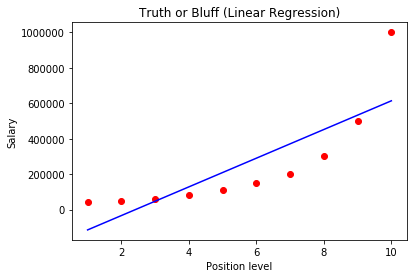

In [13]:
# Years of Experience - Salary 예제로 살펴보는 Polynomial Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

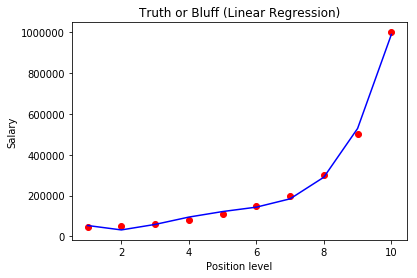

In [14]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [18]:
# 5.5년차 사원의 Salary예측 

# Predicting a new result with Linear Regression
print(lin_reg.predict([[5.5]]))
#output should be 249500

# Predicting a new result with Polymonial Regression
print(pol_reg.predict(poly_reg.fit_transform([[5.5]])))
#output should be 132148.43750003

#결과가 매우 다르게 나왔으며, linear 모델보다 Polymonial 모델이 예측을 더 잘했다.

[249500.]
[132148.43750003]


---
### 사이킷런으로 구현하는 릿지/라쏘/엘라스틱넷

#### Lasso Regression
- Cost function 에 **L1 regularization 항**을 추가
- Regularization? : overfitting 을 막기 위해 사용하는 기법. 중요하지 않은 계수 𝜃를 0에 가깝게 만들어 모델의 복잡성을 줄인다.


- sklearn.linear_model.Lasso: 라쏘 회귀 (클래스)를 불러옵니다.

    - alpha: 설정해야 하는 변수(스칼라 값)
    
#### Ridge Regression
- Cost function에 **L2 regularization 항**을 추가 


- sklearn.linear_model.Ridge: 릿지 회귀 (클래스)를 불러옵니다.

    - alpha: 설정해야 하는 변수(스칼라 값), learning rate (너무 작으면 수렴이 느림, 너무 크면 수렴 안될 수도 있음),작은 값부터 천천히 늘려나가보기

#### Elastic Net Regression
- Lasso 회귀는 너무 많은 계수를 0으로 만들어 모델의 정확성이 떨어질 수 있음
- Ridge 회귀는 계수값을 0에 가깝게 만들지만 0은 아니므로 모델이 여전히 복잡할 수 있음
- 그러면 **두 개를 같이** 써보자!!
- 𝝀𝟏과 𝝀𝟐의 비율을 조정해 가며 모델을 만든다
- 상황에 맞게 계수를 정하는 것이 중요

    
- sklearn.linear_model.ElasticNet: 엘라스틱넷 (클래스)를 불러옵니다.(Ridge와 Lasso 합친것! l2와 l1의 비율을 조정해가며 모델을 만든다)

    - alpha: 설정해야 하는 변수(스칼라 값)
    - l1_ratio: l1 norm 을 반영할 비율, 상황에 맞게 계수를 정하는 것이 중요

0.9248706298856207
0.7546386894816657
0.6540862884187704


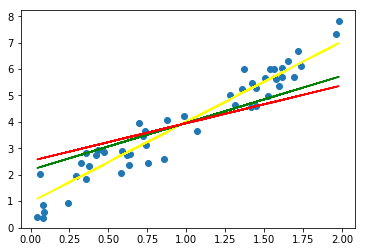

In [23]:
#릿지(Ridge) / 라쏘(Lasso) / 엘라스틱넷(ElasticNet)

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import numpy as np

x = 2*np.random.rand(50,1) # 50개씩 생성하겠다.
y = 3*x + 2*np.random.rand(50,1)

#1.릿지 회귀를 구현하고 x,y 데이터를 바탕으로 학습
ridge_reg = Ridge(alpha = 0.45) # alpha 값을 다르게 넣어가며 조정
ridge_reg.fit(x,y)

#2.라쏘 회귀를 구현하고 x,y 데이터를 바탕으로 학습
lasso_reg = Lasso(alpha = 0.45)
lasso_reg.fit(x,y)

#3.엘라스틱넷을 구현하고 x,y 데이터를 바탕으로 학습
elastic_net = ElasticNet(alpha = 0.45, l1_ratio = 0.4) 
# l1_ratio : 추가적인 파라미터 (ridge와 lasso를 합친거라 파라미터가 하나 더 필요함)
elastic_net.fit(x,y)

#4.각 모델들을 이용하여 데이터 x에 대한 예측값을 변수에 따로 저장
ridge_y_pred = ridge_reg.predict(x)
lasso_y_pred = lasso_reg.predict(x)
elastic_y_pred = elastic_net.predict(x)

print(ridge_reg.score(x,y))
print(lasso_reg.score(x,y))
print(elastic_net.score(x,y))

## 시각화
plt.scatter(x, y)

## 릿지 회귀 결과를 그래프로 나타냅니다.
plt.plot(x,ridge_y_pred, color='yellow')

## 라쏘 회귀 결과를 그래프로 나타냅니다.
plt.plot(x,lasso_y_pred, color='green')

## 엘라스틱넷 회귀 결과를 그래프로 나타냅니다.
plt.plot(x,elastic_y_pred, color='red')

#그래프를 확인합니다.
plt.show()